In [ ]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.layers import *
from keras.models import Model
from keras.layers import Dense,Embedding,LSTM

In [ ]:
df=pd.read_csv("model1_final_data.csv")

In [ ]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,loan_len,Story,Image,purpose_Beauty Salon,purpose_Cattle,purpose_Clothing Sales,purpose_Dairy,...,purpose_Others,purpose_Restaurant,purpose_Retail,purpose_Services,purpose_Shoe Sales,purpose_Tailoring,expected,Emotion,text_vector,img_context_vector
0,0,0,0,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/620df2a0f8498acb...,True,False,False,False,...,False,False,False,False,False,False,575,Happy,[ 1.01491 0.25285342 -0.37987968 1.410797...,[ 0. 0. 5.078599 3.1979098 ...
1,1,1,1,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/2bd1f94b70488503...,False,False,False,False,...,False,False,False,False,True,False,700,Sad,[ 1.0658228 0.22968242 -0.3919189 1.460685...,[ 3.9378943 0. 6.8617477 1.502139...
2,2,2,2,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/e33f4c528c56743e...,False,False,False,False,...,True,False,False,False,False,False,425,Sad,[ 1.03947353e+00 2.69484818e-01 -3.82154852e-...,[0. 0. 1.6508528 0.5964049 5...
3,3,3,3,12,This business is a member of the Golden Crown ...,https://www.kiva.org/img/w960/5b5478dc833f83a2...,True,False,False,False,...,False,False,False,False,False,False,300,Happy,[ 8.60330343e-01 2.18829557e-01 -2.89904892e-...,[ 0. 0. 4.0882993 0. ...
4,4,4,4,24,I am the owner of my own beauty salon. I had ...,https://www.kiva.org/img/w960/9b596fe845794e99...,True,False,False,False,...,False,False,False,False,False,False,800,Angry,[ 0.94853836 0.31732225 -0.11034444 1.318692...,[ 0. 0. 4.7950096 0.610533...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,6652,6652,6822,6,Doña Antonia is from San Luis Potosí. She has ...,https://www.kiva.org/img/w960/027509e29d269af4...,False,False,False,False,...,False,True,False,False,False,False,200,Angry,[ 0.71256626 0.22707205 -0.42621735 0.434244...,[0.5838458 0. 0.34141672 0.31327283 2...
6653,6653,6653,6823,6,Maria is married and has a 6 year-old son. Her...,https://www.kiva.org/img/w960/639cbc77342726ef...,False,False,False,False,...,True,False,False,False,False,False,200,Sad,[ 0.75954086 0.33107552 -0.4292754 0.453977...,[0.6211511 0. 1.7952521 0. 6...
6654,6654,6654,6824,9,Lorenza is a widow and has four married childr...,https://www.kiva.org/img/w960/55ba54a93be8e502...,False,False,False,False,...,True,False,False,False,False,False,325,Sad,[ 0.74343115 0.31840003 -0.4589778 0.458576...,[ 8.56123 0. 0.8500438 4.157629...
6655,6655,6655,6825,8,"Erika is from Tamaulipas, she is married and h...",https://www.kiva.org/img/w960/c3227ca030701318...,False,False,False,False,...,True,False,False,False,False,False,325,Angry,[ 0.6663078 0.28357488 -0.3619398 0.303319...,[ 0. 0. 0.8232988 1.609529...


In [ ]:
df=df.iloc[:,6:]

In [ ]:
df

,purpose_Beauty Salon,purpose_Cattle,purpose_Clothing Sales,purpose_Dairy,purpose_Farming,purpose_Food Market,purpose_Food Production/Sales,purpose_General Store,purpose_Grocery Store,purpose_Home Products Sales,purpose_Others,purpose_Restaurant,purpose_Retail,purpose_Services,purpose_Shoe Sales,purpose_Tailoring,expected,Emotion,text_vector,img_context_vector
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,575,Happy,[ 1.01491 0.25285342 -0.37987968 1.410797...,[ 0. 0. 5.078599 3.1979098 ...
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,700,Sad,[ 1.0658228 0.22968242 -0.3919189 1.460685...,[ 3.9378943 0. 6.8617477 1.502139...
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,425,Sad,[ 1.03947353e+00 2.69484818e-01 -3.82154852e-...,[0. 0. 1.6508528 0.5964049 5...
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,300,Happy,[ 8.60330343e-01 2.18829557e-01 -2.89904892e-...,[ 0. 0. 4.0882993 0. ...
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,800,Angry,[ 0.94853836 0.31732225 -0.11034444 1.318692...,[ 0. 0. 4.7950096 0.610533...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,200,Angry,[ 0.71256626 0.22707205 -0.42621735 0.434244...,[0.5838458 0. 0.34141672 0.31327283 2...
6653,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,200,Sad,[ 0.75954086 0.33107552 -0.4292754 0.453977...,[0.6211511 0. 1.7952521 0. 6...
6654,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,325,Sad,[ 0.74343115 0.31840003 -0.4589778 0.458576...,[ 8.56123 0. 0.8500438 4.157629...
6655,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,325,Angry,[ 0.6663078 0.28357488 -0.3619398 0.303319...,[ 0. 0. 0.8232988 1.609529...


In [ ]:
y=df["expected"]

In [ ]:
y

,expected
0,575
1,700
2,425
3,300
4,800
...,...
6652,200
6653,200
6654,325
6655,325


In [ ]:
df.drop(columns=["expected"],inplace=True)

In [ ]:
final_df = pd.get_dummies(df, columns = ['Emotion'])

In [ ]:
final_df

,purpose_Beauty Salon,purpose_Cattle,purpose_Clothing Sales,purpose_Dairy,purpose_Farming,purpose_Food Market,purpose_Food Production/Sales,purpose_General Store,purpose_Grocery Store,purpose_Home Products Sales,...,purpose_Tailoring,text_vector,img_context_vector,Emotion_Angry,Emotion_Digust,Emotion_Fear,Emotion_Happy,Emotion_Neutral,Emotion_Sad,Emotion_Surprise
0,True,False,False,False,False,False,False,False,False,False,...,False,[ 1.01491 0.25285342 -0.37987968 1.410797...,[ 0. 0. 5.078599 3.1979098 ...,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,[ 1.0658228 0.22968242 -0.3919189 1.460685...,[ 3.9378943 0. 6.8617477 1.502139...,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,[ 1.03947353e+00 2.69484818e-01 -3.82154852e-...,[0. 0. 1.6508528 0.5964049 5...,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,[ 8.60330343e-01 2.18829557e-01 -2.89904892e-...,[ 0. 0. 4.0882993 0. ...,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,[ 0.94853836 0.31732225 -0.11034444 1.318692...,[ 0. 0. 4.7950096 0.610533...,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,False,False,False,False,False,False,False,False,False,False,...,False,[ 0.71256626 0.22707205 -0.42621735 0.434244...,[0.5838458 0. 0.34141672 0.31327283 2...,True,False,False,False,False,False,False
6653,False,False,False,False,False,False,False,False,False,False,...,False,[ 0.75954086 0.33107552 -0.4292754 0.453977...,[0.6211511 0. 1.7952521 0. 6...,False,False,False,False,False,True,False
6654,False,False,False,False,False,False,False,False,False,False,...,False,[ 0.74343115 0.31840003 -0.4589778 0.458576...,[ 8.56123 0. 0.8500438 4.157629...,False,False,False,False,False,True,False
6655,False,False,False,False,False,False,False,False,False,False,...,False,[ 0.6663078 0.28357488 -0.3619398 0.303319...,[ 0. 0. 0.8232988 1.609529...,True,False,False,False,False,False,False


In [ ]:
text_vectors=final_df["text_vector"]

In [ ]:
type(text_vectors[0])

str

In [ ]:
image_vectors=final_df["img_context_vector"]

In [ ]:
image_vectors

,img_context_vector
0,[ 0. 0. 5.078599 3.1979098 ...
1,[ 3.9378943 0. 6.8617477 1.502139...
2,[0. 0. 1.6508528 0.5964049 5...
3,[ 0. 0. 4.0882993 0. ...
4,[ 0. 0. 4.7950096 0.610533...
...,...
6652,[0.5838458 0. 0.34141672 0.31327283 2...
6653,[0.6211511 0. 1.7952521 0. 6...
6654,[ 8.56123 0. 0.8500438 4.157629...
6655,[ 0. 0. 0.8232988 1.609529...


In [ ]:
type(image_vectors[0])

str

In [ ]:
image_vectors[0]

'[ 0.         0.         5.078599   3.1979098  2.96626    0.\n  0.         0.        11.18453    1.4886599  0.         5.304607\n  5.8349376  4.1555243  0.         2.87727    4.9471097  5.4494886\n  9.493337   0.         8.946302   0.         0.         5.073934\n  0.         0.         0.         1.5975181  6.6265883 10.387009\n  5.834838   7.7776327  0.         0.         0.         0.\n  0.         1.0014071  1.3333011  8.092286   0.         0.\n  1.1041874  3.4205563  3.9684517  4.981518   4.4581594  2.1594224\n  0.         0.         0.         0.         4.371022  13.62631\n  1.4941423  0.        10.070045   0.        10.638596   0.\n  2.9851542  0.         0.         0.         1.3594985  0.\n  0.         0.         0.         5.513009   0.         0.8458611\n  0.         0.         5.085745   0.        13.659667   0.\n  3.3252025  0.         0.         7.167946   2.1656754  0.\n  1.2758279  0.         4.4325566 10.651537   0.         0.\n 10.194832   0.         9.331089   6.315

In [ ]:
def clear_str(string):
  vector_str = string
  vector_str = vector_str.strip('[]')

  # Split the string into individual number strings
  str_values = vector_str.split()

  # Convert the list of strings to a list of floats
  float_values = [float(num) for num in str_values]
  return float_values

In [ ]:
img_context_df=pd.DataFrame(clear_str(string) for string in final_df["img_context_vector"])

In [ ]:
img_context_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000000,0.000000,5.078599,3.197910,2.966260,0.000000,0.000000,0.000000,11.184530,1.488660,...,0.000000,0.000000,5.841175,2.948700,3.242483,0.0,1.857879,0.000000,1.835808,0.000000
1,3.937894,0.000000,6.861748,1.502139,9.520260,0.000000,0.000000,12.006895,20.268250,1.306389,...,0.000000,0.000000,16.709936,5.301386,10.886665,0.0,3.164022,0.000000,5.347439,0.000000
2,0.000000,0.000000,1.650853,0.596405,5.840033,0.000000,0.000000,0.000000,3.302818,0.000000,...,0.000000,0.000000,7.384329,2.937482,1.913585,0.0,2.703088,0.000000,6.248355,0.000000
3,0.000000,0.000000,4.088299,0.000000,2.994082,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.570889,2.340499,0.000000,0.0,1.404670,0.000000,7.471573,0.000000
4,0.000000,0.000000,4.795010,0.610533,7.363322,0.000000,5.134295,6.525652,6.986266,2.625135,...,2.047242,4.569930,9.509227,10.770356,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,0.583846,0.000000,0.341417,0.313273,2.130124,0.000000,0.000000,2.414949,0.000000,1.944338,...,0.000000,0.365533,6.167572,1.263612,2.880440,0.0,1.192244,1.387687,3.374731,0.000000
6653,0.621151,0.000000,1.795252,0.000000,6.589800,2.764205,0.000000,1.636120,5.251599,1.141968,...,0.000000,0.000000,6.720170,3.952553,1.032323,0.0,0.000000,0.000000,2.885246,0.000000
6654,8.561230,0.000000,0.850044,4.157629,2.943383,5.973755,0.000000,0.000000,9.113396,0.000000,...,0.000000,0.000000,7.373877,3.304768,0.000000,0.0,3.652149,0.000000,2.109445,0.721419
6655,0.000000,0.000000,0.823299,1.609529,8.444552,0.000000,0.000000,6.795277,10.539767,1.094500,...,0.188811,0.000000,13.309299,4.112435,4.931084,0.0,2.611803,0.000000,5.250644,0.503578


In [ ]:
img_context_df.to_csv("img_context.csv")

In [ ]:
text_context_df=pd.DataFrame(clear_str(string) for string in final_df["text_vector"])

In [ ]:
text_context_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.014910,0.252853,-0.379880,1.410797,0.388836,0.791763,-0.237026,0.558899,0.546157,0.440661,...,-0.617720,0.514694,0.116801,0.036575,-0.718636,-0.919033,0.454730,-0.134117,1.229412,1.757918
1,1.065823,0.229682,-0.391919,1.460685,0.402574,0.795883,-0.185713,0.526532,0.502725,0.394491,...,-0.571587,0.473555,0.138692,0.109537,-0.722765,-0.950392,0.457009,-0.185827,1.385093,1.889939
2,1.039474,0.269485,-0.382155,1.401798,0.405055,0.881046,-0.299410,0.546269,0.515874,0.389682,...,-0.627544,0.464978,0.110001,-0.064721,-0.677745,-0.795289,0.414476,-0.188275,1.308334,1.825035
3,0.860330,0.218830,-0.289905,1.262394,0.402257,0.658603,-0.211523,0.403632,0.462083,0.273774,...,-0.540618,0.406806,0.088421,0.155625,-0.594723,-0.812717,0.320071,-0.149131,1.224388,1.578116
4,0.948538,0.317322,-0.110344,1.318692,0.402528,0.628134,0.074693,0.400907,0.719122,0.468153,...,-0.553735,0.456427,0.135007,0.344066,-0.740419,-1.053145,0.366101,-0.109805,1.288762,1.463667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,0.712566,0.227072,-0.426217,0.434244,0.146804,0.117592,-0.298391,0.351991,0.382872,0.562520,...,-0.236185,0.404656,0.126072,0.321125,0.219450,0.132605,-0.096266,-0.248524,0.835576,0.535454
6653,0.759541,0.331076,-0.429275,0.453977,0.232817,0.096552,-0.277148,0.348696,0.502669,0.555547,...,-0.266945,0.423430,0.166547,0.328700,0.163232,0.072732,-0.161733,-0.192053,0.991081,0.498944
6654,0.743431,0.318400,-0.458978,0.458577,0.179332,0.187098,-0.324087,0.374477,0.443122,0.544926,...,-0.219587,0.424182,0.187165,0.272953,0.168921,0.063768,-0.125275,-0.222259,0.924447,0.537829
6655,0.666308,0.283575,-0.361940,0.303319,0.222061,0.146696,-0.273449,0.393682,0.338947,0.499154,...,-0.197848,0.488660,0.212886,0.268770,0.281887,0.085529,-0.165594,-0.223574,0.828885,0.488549


In [ ]:
text_context_df.to_csv("text_context.csv")

In [ ]:
final_df

,purpose_Beauty Salon,purpose_Cattle,purpose_Clothing Sales,purpose_Dairy,purpose_Farming,purpose_Food Market,purpose_Food Production/Sales,purpose_General Store,purpose_Grocery Store,purpose_Home Products Sales,...,purpose_Tailoring,text_vector,img_context_vector,Emotion_Angry,Emotion_Digust,Emotion_Fear,Emotion_Happy,Emotion_Neutral,Emotion_Sad,Emotion_Surprise
0,True,False,False,False,False,False,False,False,False,False,...,False,[ 1.01491 0.25285342 -0.37987968 1.410797...,[ 0. 0. 5.078599 3.1979098 ...,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,[ 1.0658228 0.22968242 -0.3919189 1.460685...,[ 3.9378943 0. 6.8617477 1.502139...,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,[ 1.03947353e+00 2.69484818e-01 -3.82154852e-...,[0. 0. 1.6508528 0.5964049 5...,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,[ 8.60330343e-01 2.18829557e-01 -2.89904892e-...,[ 0. 0. 4.0882993 0. ...,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,[ 0.94853836 0.31732225 -0.11034444 1.318692...,[ 0. 0. 4.7950096 0.610533...,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,False,False,False,False,False,False,False,False,False,False,...,False,[ 0.71256626 0.22707205 -0.42621735 0.434244...,[0.5838458 0. 0.34141672 0.31327283 2...,True,False,False,False,False,False,False
6653,False,False,False,False,False,False,False,False,False,False,...,False,[ 0.75954086 0.33107552 -0.4292754 0.453977...,[0.6211511 0. 1.7952521 0. 6...,False,False,False,False,False,True,False
6654,False,False,False,False,False,False,False,False,False,False,...,False,[ 0.74343115 0.31840003 -0.4589778 0.458576...,[ 8.56123 0. 0.8500438 4.157629...,False,False,False,False,False,True,False
6655,False,False,False,False,False,False,False,False,False,False,...,False,[ 0.6663078 0.28357488 -0.3619398 0.303319...,[ 0. 0. 0.8232988 1.609529...,True,False,False,False,False,False,False


In [ ]:
final_df.drop(columns=["text_vector","img_context_vector"],inplace=True)

In [ ]:
final_df

,purpose_Beauty Salon,purpose_Cattle,purpose_Clothing Sales,purpose_Dairy,purpose_Farming,purpose_Food Market,purpose_Food Production/Sales,purpose_General Store,purpose_Grocery Store,purpose_Home Products Sales,...,purpose_Services,purpose_Shoe Sales,purpose_Tailoring,Emotion_Angry,Emotion_Digust,Emotion_Fear,Emotion_Happy,Emotion_Neutral,Emotion_Sad,Emotion_Surprise
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
6653,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6654,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6655,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
final_df.shape

(6657, 23)

In [ ]:
img_context_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000000,0.000000,5.078599,3.197910,2.966260,0.000000,0.000000,0.000000,11.184530,1.488660,...,0.000000,0.000000,5.841175,2.948700,3.242483,0.0,1.857879,0.000000,1.835808,0.000000
1,3.937894,0.000000,6.861748,1.502139,9.520260,0.000000,0.000000,12.006895,20.268250,1.306389,...,0.000000,0.000000,16.709936,5.301386,10.886665,0.0,3.164022,0.000000,5.347439,0.000000
2,0.000000,0.000000,1.650853,0.596405,5.840033,0.000000,0.000000,0.000000,3.302818,0.000000,...,0.000000,0.000000,7.384329,2.937482,1.913585,0.0,2.703088,0.000000,6.248355,0.000000
3,0.000000,0.000000,4.088299,0.000000,2.994082,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.570889,2.340499,0.000000,0.0,1.404670,0.000000,7.471573,0.000000
4,0.000000,0.000000,4.795010,0.610533,7.363322,0.000000,5.134295,6.525652,6.986266,2.625135,...,2.047242,4.569930,9.509227,10.770356,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,0.583846,0.000000,0.341417,0.313273,2.130124,0.000000,0.000000,2.414949,0.000000,1.944338,...,0.000000,0.365533,6.167572,1.263612,2.880440,0.0,1.192244,1.387687,3.374731,0.000000
6653,0.621151,0.000000,1.795252,0.000000,6.589800,2.764205,0.000000,1.636120,5.251599,1.141968,...,0.000000,0.000000,6.720170,3.952553,1.032323,0.0,0.000000,0.000000,2.885246,0.000000
6654,8.561230,0.000000,0.850044,4.157629,2.943383,5.973755,0.000000,0.000000,9.113396,0.000000,...,0.000000,0.000000,7.373877,3.304768,0.000000,0.0,3.652149,0.000000,2.109445,0.721419
6655,0.000000,0.000000,0.823299,1.609529,8.444552,0.000000,0.000000,6.795277,10.539767,1.094500,...,0.188811,0.000000,13.309299,4.112435,4.931084,0.0,2.611803,0.000000,5.250644,0.503578


In [ ]:
text_context_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.014910,0.252853,-0.379880,1.410797,0.388836,0.791763,-0.237026,0.558899,0.546157,0.440661,...,-0.617720,0.514694,0.116801,0.036575,-0.718636,-0.919033,0.454730,-0.134117,1.229412,1.757918
1,1.065823,0.229682,-0.391919,1.460685,0.402574,0.795883,-0.185713,0.526532,0.502725,0.394491,...,-0.571587,0.473555,0.138692,0.109537,-0.722765,-0.950392,0.457009,-0.185827,1.385093,1.889939
2,1.039474,0.269485,-0.382155,1.401798,0.405055,0.881046,-0.299410,0.546269,0.515874,0.389682,...,-0.627544,0.464978,0.110001,-0.064721,-0.677745,-0.795289,0.414476,-0.188275,1.308334,1.825035
3,0.860330,0.218830,-0.289905,1.262394,0.402257,0.658603,-0.211523,0.403632,0.462083,0.273774,...,-0.540618,0.406806,0.088421,0.155625,-0.594723,-0.812717,0.320071,-0.149131,1.224388,1.578116
4,0.948538,0.317322,-0.110344,1.318692,0.402528,0.628134,0.074693,0.400907,0.719122,0.468153,...,-0.553735,0.456427,0.135007,0.344066,-0.740419,-1.053145,0.366101,-0.109805,1.288762,1.463667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,0.712566,0.227072,-0.426217,0.434244,0.146804,0.117592,-0.298391,0.351991,0.382872,0.562520,...,-0.236185,0.404656,0.126072,0.321125,0.219450,0.132605,-0.096266,-0.248524,0.835576,0.535454
6653,0.759541,0.331076,-0.429275,0.453977,0.232817,0.096552,-0.277148,0.348696,0.502669,0.555547,...,-0.266945,0.423430,0.166547,0.328700,0.163232,0.072732,-0.161733,-0.192053,0.991081,0.498944
6654,0.743431,0.318400,-0.458978,0.458577,0.179332,0.187098,-0.324087,0.374477,0.443122,0.544926,...,-0.219587,0.424182,0.187165,0.272953,0.168921,0.063768,-0.125275,-0.222259,0.924447,0.537829
6655,0.666308,0.283575,-0.361940,0.303319,0.222061,0.146696,-0.273449,0.393682,0.338947,0.499154,...,-0.197848,0.488660,0.212886,0.268770,0.281887,0.085529,-0.165594,-0.223574,0.828885,0.488549


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
text_arr=scaler.fit_transform(text_context_df)

In [ ]:
text_context_df=pd.DataFrame(text_arr)

In [ ]:
text_context_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.755594,0.285740,-0.734899,1.009256,0.464881,0.857644,-0.865157,0.501504,0.493667,0.240344,...,-0.874728,0.685316,0.662654,-0.940975,-1.114148,-1.075791,1.134633,0.122070,0.833995,1.091302
1,0.878064,0.140133,-0.816977,1.099391,0.540965,0.868307,-0.516755,0.380211,0.338458,0.026512,...,-0.722214,0.488112,0.836411,-0.545683,-1.123611,-1.144830,1.142879,-0.308507,1.190786,1.281352
2,0.814681,0.390252,-0.750410,0.992996,0.554702,1.088729,-1.288728,0.454175,0.385448,0.004238,...,-0.907206,0.446996,0.608676,-1.489773,-1.020426,-0.803357,0.988981,-0.328890,1.014871,1.187920
3,0.383757,0.071933,-0.121489,0.741127,0.539207,0.512996,-0.691997,-0.080357,0.193223,-0.532572,...,-0.619833,0.168135,0.437378,-0.295985,-0.830138,-0.841727,0.647389,-0.002951,0.822483,0.832467
4,0.595939,0.690863,1.102677,0.842845,0.540711,0.434134,1.251340,-0.090572,1.111763,0.367669,...,-0.663198,0.406004,0.807163,0.724947,-1.164073,-1.371053,0.813945,0.324504,0.970015,0.667711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,0.028315,0.123729,-1.050809,-0.755136,-0.875524,-0.887264,-1.281808,-0.273882,-0.089841,0.804716,...,0.386607,0.157828,0.736244,0.600656,1.035939,1.239490,-0.859066,-0.830569,-0.068597,-0.668501
6653,0.141311,0.777289,-1.071657,-0.719483,-0.399174,-0.941720,-1.137574,-0.286230,0.338258,0.772420,...,0.284917,0.247825,1.057521,0.641698,0.907087,1.107673,-1.095948,-0.360353,0.287788,-0.721058
6654,0.102560,0.697636,-1.274156,-0.711173,-0.695382,-0.707367,-1.456279,-0.189616,0.125466,0.723231,...,0.441479,0.251430,1.221173,0.339673,0.920126,1.087939,-0.964028,-0.611869,0.135078,-0.665082
6655,-0.082959,0.478794,-0.612592,-0.991685,-0.458741,-0.811938,-1.112458,-0.117647,-0.246809,0.511247,...,0.513348,0.560520,1.425336,0.317010,1.179044,1.135848,-1.109920,-0.622816,-0.083933,-0.736023


In [ ]:
scaler2=StandardScaler()

In [ ]:
img_arr=scaler2.fit_transform(img_context_df)

In [ ]:
img_context_df=pd.DataFrame(img_arr)

In [ ]:
img_context_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.756400,-0.411849,1.398213,0.410376,-0.235977,-0.457020,-0.628618,-1.084552,1.313140,-0.046993,...,-0.256721,-0.493554,-0.374779,-0.194496,-0.032491,-0.137781,1.175023,-0.209107,0.078328,-0.433174
1,0.896572,-0.411849,2.125528,-0.262492,1.543767,-0.457020,-0.628618,2.439671,3.361037,-0.127330,...,-0.256721,-0.493554,1.521239,0.468599,2.059815,-0.137781,2.226831,-0.209107,1.452729,-0.433174
2,-0.756400,-0.411849,0.000097,-0.621879,0.544399,-0.457020,-0.628618,-1.084552,-0.463768,-0.703129,...,-0.256721,-0.493554,-0.105581,-0.197658,-0.396226,-0.137781,1.855651,-0.209107,1.805335,-0.433174
3,-0.756400,-0.411849,0.994288,-0.858528,-0.228422,-0.457020,-0.628618,-1.084552,-1.208378,-0.703129,...,-0.256721,-0.493554,0.275857,-0.365915,-0.919998,-0.137781,0.810064,-0.209107,2.284085,-0.433174
4,-0.756400,-0.411849,1.282542,-0.616273,0.958049,-0.457020,1.457610,0.830835,0.366655,0.453915,...,1.920448,1.477476,0.265100,2.010006,-0.919998,-0.137781,-0.321084,-0.209107,-0.640181,-0.433174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,-0.511324,-0.411849,-0.533999,-0.734224,-0.463030,-0.457020,-0.628618,-0.375724,-1.208378,0.153850,...,-0.256721,-0.335897,-0.317840,-0.669432,-0.131586,-0.137781,0.639002,2.382526,0.680640,-0.433174
6653,-0.495665,-0.411849,0.058995,-0.858528,0.747998,1.107725,-0.628618,-0.604324,-0.024421,-0.199800,...,-0.256721,-0.493554,-0.221441,0.088436,-0.637438,-0.137781,-0.321084,-0.209107,0.489062,-0.433174
6654,2.837265,-0.411849,-0.326539,0.791184,-0.242189,2.924569,-0.628618,-1.084552,0.846209,-0.703129,...,-0.256721,-0.493554,-0.107404,-0.094140,-0.919998,-0.137781,2.619909,-0.209107,0.185425,0.101141
6655,-0.756400,-0.411849,-0.337448,-0.219880,1.251657,-0.457020,-0.628618,0.909975,1.167780,-0.220721,...,-0.055927,-0.493554,0.928009,0.133498,0.429700,-0.137781,1.782141,-0.209107,1.414845,-0.060202


In [ ]:
# inputA= final_df
# inputB= img_context_df
# inputC= text_context_df

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca1 = PCA(n_components=10)
input1 = pca1.fit_transform(final_df)

In [ ]:
pca2 = PCA(n_components=30)
input2 = pca2.fit_transform(img_context_df)

In [ ]:
pca3 = PCA(n_components=30)
input3 = pca3.fit_transform(text_context_df)

In [ ]:
inputA = Input(shape=(10,))
inputB= Input(shape=(30,))
inputC= Input(shape=(30,))

In [ ]:
from tensorflow.keras.layers import LeakyReLU

In [ ]:
# the first branch operates on the first input
x=Dense(100,activation=LeakyReLU(negative_slope=0))(inputA)
x1=Dense(100,activation=LeakyReLU(negative_slope=0))(x)
x2=Dense(80,activation=LeakyReLU(negative_slope=0))(x1)
x3=Dense(80,activation=LeakyReLU(negative_slope=0))(x2)
x4=Dense(30,activation=LeakyReLU(negative_slope=0))(x3)

In [ ]:
y = Dense(100, activation=LeakyReLU(negative_slope=0))(inputB)
y1 = Dense(100, activation=LeakyReLU(negative_slope=0))(y)
y2 = Dense(80, activation=LeakyReLU(negative_slope=0))(y1)
y3 = Dense(80, activation=LeakyReLU(negative_slope=0))(y2)
y4 = Dense(40, activation=LeakyReLU(negative_slope=0))(y3)

In [ ]:
# total words, output vector size(embedding size)
z=Dense(100,activation=LeakyReLU(negative_slope=0))(inputC)
z1=Dense(100,activation=LeakyReLU(negative_slope=0))(z)
z2=Dense(80,activation=LeakyReLU(negative_slope=0))(z1)
z3=Dense(80,activation=LeakyReLU(negative_slope=0))(z2)
z4=Dense(40,activation=LeakyReLU(negative_slope=0))(z3)

In [ ]:
combined = concatenate([x4, y4, z4])

In [ ]:
expected=[]
for x in y:
  if x>=700:
    expected.append("very_high")
  elif x>=500:
    expected.append("high")
  elif x>=300:
    expected.append("medium")
  elif x>=100:
    expected.append("low")
  else:
    expected.append("very_low")

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the list
encoded_labels = label_encoder.fit_transform(expected)

In [ ]:
encoded_labels

array([0, 3, 2, ..., 2, 2, 1])

In [ ]:
# apply a FC layer and then a regression prediction on the
# combined outputs
op1 = Dense(150, activation=LeakyReLU(negative_slope=0))(combined)
op1 = Dropout(0.3)(op1)
op2 = Dense(150, activation=LeakyReLU(negative_slope=0))(op1)
op2 = Dropout(0.3)(op2)
op3 = Dense(120, activation=LeakyReLU(negative_slope=0))(op2)
op3 = Dropout(0.3)(op3)
op4 = Dense(100, activation=LeakyReLU(negative_slope=0))(op3)
op4 = Dropout(0.3)(op4)
op5 = Dense(100, activation=LeakyReLU(negative_slope=0))(op4)
op5 = Dropout(0.3)(op5)
op6 = Dense(50, activation=LeakyReLU(negative_slope=0))(op5)
op6 = Dropout(0.3)(op6)
op7 = Dense(30, activation=LeakyReLU(negative_slope=0))(op6)
op8 = Dense(5, activation="softmax")(op7)

In [ ]:
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[inputA, inputB, inputC], outputs=op8)

In [ ]:
model.summary()

Model: "functional_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_11            │ (None, 30)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_12            │ (None, 30)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_446 (Dense)         │ (None, 100)            │          1,100 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_451 (Dense)         │ (None, 100)            │          3,100 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_456 (Dense)         │ (None, 100)            │          3,100 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_447 (Dense)         │ (None, 100)            │         10,100 │ dense_446[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_452 (Dense)         │ (None, 100)            │         10,100 │ dense_451[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_457 (Dense)         │ (None, 100)            │         10,100 │ dense_456[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_448 (Dense)         │ (None, 80)             │          8,080 │ dense_447[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_453 (Dense)         │ (None, 80)             │          8,080 │ dense_452[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_458 (Dense)         │ (None, 80)             │          8,080 │ dense_457[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_449 (Dense)         │ (None, 80)             │          6,480 │ dense_448[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_454 (Dense)         │ (None, 80)             │          6,480 │ dense_453[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_459 (Dense)         │ (None, 80)             │          6,480 │ dense_458[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_450 (Dense)         │ (None, 30)             │          2,430 │ dense_449[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_455 (Dense)         │ (None, 40)             │          3,240 │ dense_454[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_460 (Dense)         │ (None, 40)             │          3,240 │ dense_459[0][0]        │
├──────────────────────

 Total params: 176,545 (689.63 KB)

 Trainable params: 176,545 (689.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# from keras.utils import plot_model
# plot_model(model)

In [ ]:
# inputA= final_df
# inputB= img_context_df
# inputC= text_context_df
# output= y

In [ ]:
y

<KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=keras_tensor_1181>

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit([input1, input2, input3], encoded_labels,validation_split=0.2,batch_size=130,epochs=50)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.2680 - loss: 1.5773 - val_accuracy: 0.2350 - val_loss: 1.5903
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3167 - loss: 1.5133 - val_accuracy: 0.3416 - val_loss: 1.5795
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3395 - loss: 1.4780 - val_accuracy: 0.3251 - val_loss: 1.5213
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3520 - loss: 1.4332 - val_accuracy: 0.3146 - val_loss: 1.5033
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4270 - loss: 1.3871 - val_accuracy: 0.2980 - val_loss: 1.5418
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4363 - loss: 1.3585 - val_accuracy: 0.3063 - val_loss: 1.5043
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4580 - loss: 1.3235 - val_accuracy: 0.3498 - val_loss: 1.5125
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4732 - loss: 1.2876 - val_accuracy: 0.3333 - v

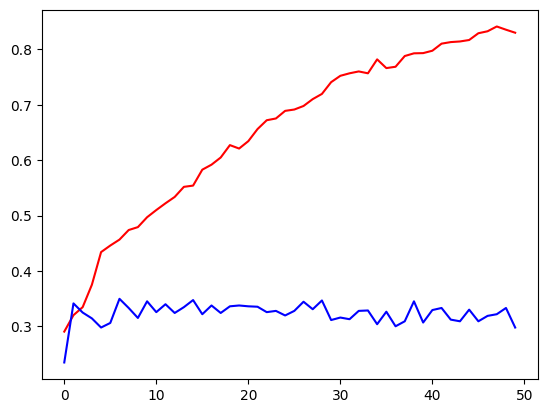

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],c="red")
plt.plot(history.history["val_accuracy"],c="blue")

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from keras_tuner import HyperModel
from keras_tuner import RandomSearch

# Define the hypermodel function
def build_model(hp):
    # Define the input layers
    input1 = layers.Input(shape=(10,))
    input2 = layers.Input(shape=(30,))
    input3 = layers.Input(shape=(30,))

    # Define the hyperparameters for the first input branch
    x1 = layers.Dense(units=hp.Int('units_input1', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input1', ['relu', 'tanh', 'sigmoid']))(input1)
    x1 = layers.Dropout(rate=hp.Float('dropout_input1', min_value=0.0, max_value=0.5, step=0.1))(x1)
    x1 = layers.Dense(units=hp.Int('units_input2', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input2', ['relu', 'tanh', 'sigmoid']))(x1)
    x1 = layers.Dropout(rate=hp.Float('dropout_input2', min_value=0.0, max_value=0.5, step=0.1))(x1)
    x1 = layers.Dense(units=hp.Int('units_input3', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input3', ['relu', 'tanh', 'sigmoid']))(x1)
    x1 = layers.Dropout(rate=hp.Float('dropout_input3', min_value=0.0, max_value=0.5, step=0.1))(x1)
    x1 = layers.Dense(units=hp.Int('units_input4', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input4', ['relu', 'tanh', 'sigmoid']))(x1)
    x1 = layers.Dropout(rate=hp.Float('dropout_input4', min_value=0.0, max_value=0.5, step=0.1))(x1)

    # Define the hyperparameters for the second input branch
    y1 = layers.Dense(units=hp.Int('units_input5', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input5', ['relu', 'tanh', 'sigmoid']))(input2)
    y1 = layers.Dropout(rate=hp.Float('dropout_input5', min_value=0.0, max_value=0.5, step=0.1))(y1)
    y1 = layers.Dense(units=hp.Int('units_input6', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input6', ['relu', 'tanh', 'sigmoid']))(input2)
    y1 = layers.Dropout(rate=hp.Float('dropout_input6', min_value=0.0, max_value=0.5, step=0.1))(y1)
    y1 = layers.Dense(units=hp.Int('units_input7', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input7', ['relu', 'tanh', 'sigmoid']))(input2)
    y1 = layers.Dropout(rate=hp.Float('dropout_input7', min_value=0.0, max_value=0.5, step=0.1))(y1)
    y1 = layers.Dense(units=hp.Int('units_input8', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input8', ['relu', 'tanh', 'sigmoid']))(input2)
    y1 = layers.Dropout(rate=hp.Float('dropout_input8', min_value=0.0, max_value=0.5, step=0.1))(y1)

    # Define the hyperparameters for the third input branch
    z1 = layers.Dense(units=hp.Int('units_input9', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input9', ['relu', 'tanh', 'sigmoid']))(input3)
    z1 = layers.Dropout(rate=hp.Float('dropout_input9', min_value=0.0, max_value=0.5, step=0.1))(z1)
    z1 = layers.Dense(units=hp.Int('units_input10', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input10', ['relu', 'tanh', 'sigmoid']))(input3)
    z1 = layers.Dropout(rate=hp.Float('dropout_input10', min_value=0.0, max_value=0.5, step=0.1))(z1)
    z1 = layers.Dense(units=hp.Int('units_input11', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input11', ['relu', 'tanh', 'sigmoid']))(input3)
    z1 = layers.Dropout(rate=hp.Float('dropout_input11', min_value=0.0, max_value=0.5, step=0.1))(z1)
    z1 = layers.Dense(units=hp.Int('units_input12', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_input12', ['relu', 'tanh', 'sigmoid']))(input3)
    z1 = layers.Dropout(rate=hp.Float('dropout_input12', min_value=0.0, max_value=0.5, step=0.1))(z1)

    # Combine the branches
    combined = layers.concatenate([x1, y1, z1])

    # Output layer
    op = layers.Dense(units=hp.Int('units_output1', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_output1', ['relu', 'tanh', 'sigmoid']))(combined)
    op = layers.Dropout(rate=hp.Float('dropout_output1', min_value=0.0, max_value=0.5, step=0.1))(op)
    op = layers.Dense(units=hp.Int('units_output2', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_output2', ['relu', 'tanh', 'sigmoid']))(op)
    op = layers.Dropout(rate=hp.Float('dropout_output2', min_value=0.0, max_value=0.5, step=0.1))(op)
    op = layers.Dense(units=hp.Int('units_output3', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_output3', ['relu', 'tanh', 'sigmoid']))(op)
    op = layers.Dropout(rate=hp.Float('dropout_output3', min_value=0.0, max_value=0.5, step=0.1))(op)
    op = layers.Dense(units=hp.Int('units_output4', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_output4', ['relu', 'tanh', 'sigmoid']))(op)
    op = layers.Dropout(rate=hp.Float('dropout_output4', min_value=0.0, max_value=0.5, step=0.1))(op)
    op = layers.Dense(units=hp.Int('units_output5', min_value=4, max_value=256, step=4), activation=hp.Choice('activation_output5', ['relu', 'tanh', 'sigmoid']))(op)
    op = layers.Dropout(rate=hp.Float('dropout_output5', min_value=0.0, max_value=0.5, step=0.1))(op)
    output = layers.Dense(5, activation='softmax')(op)

    # Define the model
    model = Model(inputs=[input1, input2, input3], outputs=output)

    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd', 'nadam'])

    # Compile the model with the selected optimizer and a tunable learning rate
    if optimizer == 'adam':
      opt = tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG'))
    elif optimizer == 'rmsprop':
      opt = tf.keras.optimizers.RMSprop(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG'))
    elif optimizer == 'sgd':
      opt = tf.keras.optimizers.SGD(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG'))
    elif optimizer == 'nadam':
      opt = tf.keras.optimizers.Nadam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG'))

    # Compile the model with a tunable learning rate
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',metrics=["accuracy"])

    return model

In [ ]:
# Initialize the tuner
tuner = RandomSearch(
    build_model,  # The hypermodel function
    objective='val_accuracy',  # The objective to minimize
    max_trials=10,  # Number of different models to try
    executions_per_trial=2,  # Number of times to train each model
    directory='my_dir8',  # Where to save the search results
    project_name='tuning'  # Name of the project
)

In [ ]:
tuner.search([input1, input2, input3], encoded_labels,
             validation_split=0.2,
             epochs=40,
             batch_size=tuner.oracle.hyperparameters.Int('batch_size', min_value=4, max_value=128, step=4)
            )

Trial 10 Complete [00h 09m 15s]
val_accuracy: 0.39451952278614044

Best val_accuracy So Far: 0.39677177369594574
Total elapsed time: 02h 02m 28s


In [ ]:
# Get the optimal hyperparameters (no num_models argument)
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Get the best model (using num_models argument here)
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
best_model.evaluate([input1, input2, input3], encoded_labels)

209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5302 - loss: 1.1808


[1.2334327697753906, 0.5132942795753479]

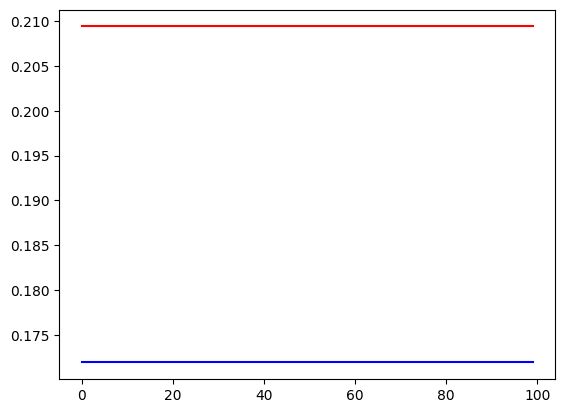

In [ ]:
plt.plot(history.history["accuracy"],c="red")
plt.plot(history.history["val_accuracy"],c="blue")

In [ ]:
final_df

,purpose_Beauty Salon,purpose_Cattle,purpose_Clothing Sales,purpose_Dairy,purpose_Farming,purpose_Food Market,purpose_Food Production/Sales,purpose_General Store,purpose_Grocery Store,purpose_Home Products Sales,...,purpose_Services,purpose_Shoe Sales,purpose_Tailoring,Emotion_Angry,Emotion_Digust,Emotion_Fear,Emotion_Happy,Emotion_Neutral,Emotion_Sad,Emotion_Surprise
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
6653,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6654,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6655,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
final_arr = scaler.fit_transform(final_df)

In [ ]:
final_arr

array([[ 6.17728286, -0.12223462, -0.29890982, ..., -0.59811383,
        -0.58816334, -0.23091727],
       [-0.16188347, -0.12223462, -0.29890982, ..., -0.59811383,
         1.70020798, -0.23091727],
       [-0.16188347, -0.12223462, -0.29890982, ..., -0.59811383,
         1.70020798, -0.23091727],
       ...,
       [-0.16188347, -0.12223462, -0.29890982, ..., -0.59811383,
         1.70020798, -0.23091727],
       [-0.16188347, -0.12223462, -0.29890982, ..., -0.59811383,
        -0.58816334, -0.23091727],
       [-0.16188347, -0.12223462, -0.29890982, ..., -0.59811383,
        -0.58816334, -0.23091727]])

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(final_arr)

In [ ]:
final_df=pd.DataFrame(X_pca)

In [ ]:
final_df

,0,1,2,3,4,5,6,7,8,9
0,-0.779217,-0.865748,1.063356,2.396066,-2.010349,-1.039703,-0.178396,0.230630,-0.348387,1.378142
1,0.278737,-1.318508,-0.767121,-0.487202,0.598276,-0.695965,-0.084503,0.174249,-1.273801,-0.386366
2,2.303686,-0.267643,-0.833906,-0.340840,-0.130974,-0.085221,-0.271639,-0.010116,0.017183,-0.073371
3,-0.779217,-0.865748,1.063356,2.396066,-2.010349,-1.039703,-0.178396,0.230630,-0.348387,1.378142
4,-0.640849,-0.779910,0.899810,1.682925,1.369556,1.343871,-0.338672,0.576593,-1.016911,1.506129
...,...,...,...,...,...,...,...,...,...,...
6652,-0.764858,-0.086857,-0.289731,1.978012,1.576066,1.534091,-0.717922,0.446913,-1.957499,0.686119
6653,2.303686,-0.267643,-0.833906,-0.340840,-0.130974,-0.085221,-0.271639,-0.010116,0.017183,-0.073371
6654,2.303686,-0.267643,-0.833906,-0.340840,-0.130974,-0.085221,-0.271639,-0.010116,0.017183,-0.073371
6655,1.219640,0.741227,0.677513,1.148119,1.585908,2.122197,-0.605940,0.409729,-0.488609,0.396975


In [ ]:
from keras import Sequential
from keras.layers import *

In [ ]:
model2=Sequential()

In [ ]:
model2.add(Dense(100,activation=LeakyReLU(negative_slope=0.01)))
# model2.add(Dropout(0.3))
# model2.add(BatchNormalization())
model2.add(Dense(100,activation=LeakyReLU(negative_slope=0.01)))
# model2.add(Dropout(0.3))
# model2.add(BatchNormalization())
model2.add(Dense(80,activation=LeakyReLU(negative_slope=0.01)))
# model2.add(Dropout(0.3))
# model2.add(BatchNormalization())
model2.add(Dense(80,activation=LeakyReLU(negative_slope=0.01)))
# model2.add(Dropout(0.3))
# model2.add(BatchNormalization())
model2.add(Dense(50,activation=LeakyReLU(negative_slope=0.01)))
# model2.add(Dropout(0.3))
# model2.add(BatchNormalization())
model2.add(Dense(5,activation="softmax"))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model2.compile(optimizer=RMSprop(learning_rate=0.001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
y

,expected
0,575
1,700
2,425
3,300
4,800
...,...
6652,200
6653,200
6654,325
6655,325


In [ ]:
expected=[]
for x in y:
  if x>=700:
    expected.append("very_high")
  elif x>=500:
    expected.append("high")
  elif x>=300:
    expected.append("medium")
  elif x>=100:
    expected.append("low")
  else:
    expected.append("very_low")

In [ ]:
# expected

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the list
encoded_labels = label_encoder.fit_transform(expected)

In [ ]:
print(f"Encoded Labels: {encoded_labels}")

Encoded Labels: [0 3 2 ... 2 2 1]


In [ ]:
history2=model2.fit(final_df,encoded_labels,validation_split=0.2,epochs=100)

Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3151 - loss: 1.5574 - val_accuracy: 0.2680 - val_loss: 1.6071
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3185 - loss: 1.5432 - val_accuracy: 0.2530 - val_loss: 1.6322
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3178 - loss: 1.5291 - val_accuracy: 0.2515 - val_loss: 1.6209
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3050 - loss: 1.5400 - val_accuracy: 0.2718 - val_loss: 1.6090
Epoch 5/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3205 - loss: 1.5422 - val_accuracy: 0.2718 - val_loss: 1.6385
Epoch 6/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3268 - loss: 1.5289 - val_accuracy: 0.2560 - val_loss: 1.6473
Epoch 7/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3145 - loss: 1.5372 - val_accuracy: 0.2748 - val_loss: 1.6391
Epoch 8/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3264 - loss: 1.5314 - val_accu

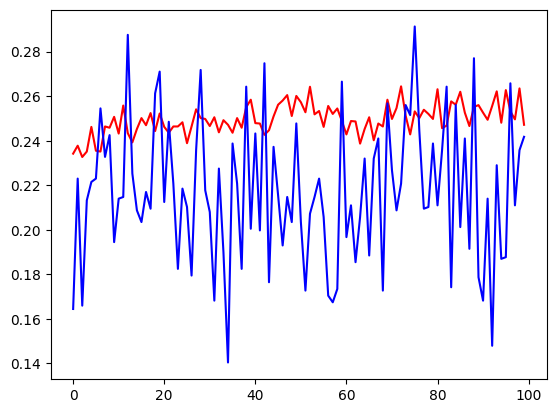

In [ ]:
plt.plot(history2.history["accuracy"],c="red")
plt.plot(history2.history["val_accuracy"],c="blue")